In [1]:
import pandas as pd
import glob
import sys
import logging

%run ../common/scripts.ipynb
if "../../streambed" not in sys.path:
    sys.path.append("../../streambed")
import streambed
streambed.setup_logging(default_path="./logging.yaml", default_level=logging.WARN)
logger = logging.getLogger('streambed')

from matplotlib import pyplot as plt
import seaborn as sns

/home/grosinosky/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/grosinosky/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
map_files = {
    "./regression-results/final/q1-20230722031321.csv": "./search-results/final/q1-20230704233749",
    "./regression-results/final/q2-20230722095421.csv": "./search-results/final/q2-20230711014507",
    "./regression-results/final/q2b-20230724005714.csv": "./search-results/final/q2-20230711014507",
    "./regression-results/final/q5-20230723032347.csv": "./search-results/final/q5-20230620132451",
    "./regression-results/final/q5b-20230724203457.csv": "./search-results/final/q5-20230620132451",
    "./regression-results/final/q11-20230723130441.csv": "./search-results/final/q11-20230615031213",
    "./regression-results/final/q11b-20230724030720.csv": "./search-results/final/q11-20230615031213",
    "./regression-results/final/q8-20230724234441.csv": "./search-results/final/q8-20230628131449",
    "./regression-results/final/q8-20230725035631.csv": "./search-results/final/q8-20230628131449",
    
    #"./regression-results/final-q1-20230715155335.csv": "./search-results/q1-20230704233749.csv",
    #"./regression-results/final-q2-20230715200306.csv": "./search-results/q2-20230711014507.csv",
    #"./regression-results/final-q2-20230716051331.csv": "./search-results/q2-20230711014507.csv",
}

In [3]:
import yaml
reg = streambed.InfrastructureRegression()
df_meta = None
for file in map_files:
    print(file)
    df = pd.read_csv(file, sep=";", header=None, names=["params_datagen_run", "task_parallelism", "job_id", "cpu", "memory", "task_managers_qty", "run", "start_time", "duration", "task_slots", "source_parallelism", "parallelism", "evenly_spread", "task_slots_limit", "observed_source_rate", "objective"])
    df["file"] = file
    #df["ratio"] = df["run"]/df["TPS"]
    if df_meta is not None:
        df_meta = pd.concat([df_meta, df])
    else:
        df_meta = df
df_meta["query"] = df_meta["params_datagen_run"].apply(lambda x: yaml.safe_load(x)["notebook"].split("_")[2])
df_meta["TPS"] = df_meta["params_datagen_run"].apply(lambda x: yaml.safe_load(x)["params.TPS"])
df_meta["ratio"] = df_meta["run"]/df_meta["TPS"]
df_synthese = df_meta[["query", "job_id", "memory", "run", "TPS", "file", "ratio"]]

display(df_synthese)

./regression-results/final/q1-20230722031321.csv
./regression-results/final/q2-20230722095421.csv
./regression-results/final/q2b-20230724005714.csv
./regression-results/final/q5-20230723032347.csv
./regression-results/final/q5b-20230724203457.csv
./regression-results/final/q11-20230723130441.csv
./regression-results/final/q11b-20230724030720.csv
./regression-results/final/q8-20230724234441.csv
./regression-results/final/q8-20230725035631.csv


,query,job_id,memory,run,TPS,file,ratio
0,q1,36e47977ebcf28616e404090d2f6f79e,8192,160000000,160000000,./regression-results/final/q1-20230722031321.csv,1.0
1,q1,62d7c000101775c2d14814ad75c193d7,8192,192000000,160000000,./regression-results/final/q1-20230722031321.csv,1.2
2,q1,878c83b8c3e9233eb0e50acdc1d5a106,8192,240000000,160000000,./regression-results/final/q1-20230722031321.csv,1.5
3,q1,7fa1e2aaa07515c3a428007d2e248f9e,16384,160000000,160000000,./regression-results/final/q1-20230722031321.csv,1.0
4,q1,27d894edbc930c8f70218e1486558c31,16384,192000000,160000000,./regression-results/final/q1-20230722031321.csv,1.2
5,q1,4cfe82d99b07c23d3039661f67597e40,16384,240000000,160000000,./regression-results/final/q1-20230722031321.csv,1.5
6,q1,a3b0207b9f665317dc19f486b7bea8ac,32768,160000000,160000000,./regression-results/final/q1-20230722031321.csv,1.0
7,q1,4fc53d85631ab43273bfdcc4bf68ded2,32768,192000000,160000000,./regression-results/final/q1-20230722031321.csv,1.2
8,q1,887271cee1313ddadb1f43258b63a578,32768,240000000,160000000,./regression-results/final/q1-20230722031321.csv,1.5
9,q1,bb08b7334b4c40d462bdab2f1850c3ac,65536,160000000,160000000,./regression-results/final/q1-20230722031321.csv,1.0


In [4]:
grp_df = None
grp_df_pending = None

for line in df_synthese.to_dict(orient="records"):
    f = "{}-{}-details.h5".format(line["file"].split(".csv")[0], line["job_id"])
    print(f)
    store = pd.HDFStore(f, mode="r")
    df = store["/rate_out_sum"]

    df["from_beginning"] = df.index - df.index.min()
    
    df = df[df["from_beginning"]  > pd.Timedelta(seconds=300)]
    df = df[df["from_beginning"] < pd.Timedelta(seconds=7200-30)] # limit to the actual duration of the experiment
    df["second"] = df["from_beginning"].dt.total_seconds().astype(int)
    #df= pd.concat([pd.DataFrame.from_dict([line]*len(df)), df], axis=1)
    df = pd.concat([df, pd.DataFrame([line] * len(df), index=df.index)], axis=1)
    if grp_df is None:
        grp_df = df
    else:
        grp_df = pd.concat([grp_df, df])

    f = "{}-{}.h5".format(line["file"].split(".csv")[0], line["job_id"])
    store = pd.HDFStore(f, mode="r")
    df = store["flink_taskmanager_job_task_operator_pendingRecords"]
    if len(df) > 0:
        df["from_beginning"] = df.index - df.index.min()
        
        df = df[df["from_beginning"]  > pd.Timedelta(seconds=300)]
        df = df[df["from_beginning"] < pd.Timedelta(seconds=7200-30)] # limit to the actual duration of the experiment
        df["second"] = df["from_beginning"].dt.total_seconds().astype(int)
        df = pd.concat([df, pd.DataFrame([line] * len(df), index=df.index)], axis=1)
    if grp_df_pending is None:
        grp_df_pending = df
    else:
        grp_df_pending = pd.concat([grp_df_pending, df])



./regression-results/final/q1-20230722031321-36e47977ebcf28616e404090d2f6f79e-details.h5
./regression-results/final/q1-20230722031321-62d7c000101775c2d14814ad75c193d7-details.h5
./regression-results/final/q1-20230722031321-878c83b8c3e9233eb0e50acdc1d5a106-details.h5
./regression-results/final/q1-20230722031321-7fa1e2aaa07515c3a428007d2e248f9e-details.h5
./regression-results/final/q1-20230722031321-27d894edbc930c8f70218e1486558c31-details.h5
./regression-results/final/q1-20230722031321-4cfe82d99b07c23d3039661f67597e40-details.h5
./regression-results/final/q1-20230722031321-a3b0207b9f665317dc19f486b7bea8ac-details.h5
./regression-results/final/q1-20230722031321-4fc53d85631ab43273bfdcc4bf68ded2-details.h5
./regression-results/final/q1-20230722031321-887271cee1313ddadb1f43258b63a578-details.h5
./regression-results/final/q1-20230722031321-bb08b7334b4c40d462bdab2f1850c3ac-details.h5
./regression-results/final/q1-20230722031321-9ecd8aa8c72ca7d23a962877bde10512-details.h5
./regression-results/

In [5]:
grp_df["rate_source"] = grp_df.filter(regex=r'.*task_name="Source.*', axis=1).sum(axis=1)
display(grp_df.groupby(["query", "ratio", "memory"])["rate_source"].describe())

count          mean           std           min  \
query ratio memory                                                     
q1    1.0   8192     303.0  1.599997e+08  2.833110e+04  1.599238e+08   
            16384    303.0  1.600013e+08  7.673704e+04  1.597318e+08   
            32768    303.0  1.599998e+08  2.951754e+05  1.570891e+08   
            65536    303.0  1.599998e+08  9.031362e+03  1.599621e+08   
      1.2   8192     302.0  1.861513e+08  6.962785e+05  1.842995e+08   
            16384    302.0  1.875490e+08  4.002641e+05  1.864642e+08   
            32768    302.0  1.890409e+08  6.508146e+05  1.872330e+08   
            65536    302.0  1.903419e+08  4.793896e+05  1.889237e+08   
      1.5   8192     302.0  1.791968e+08  1.281943e+06  1.754215e+08   
            16384    302.0  2.013218e+08  2.553384e+06  1.746456e+08   
            32768    302.0  2.069000e+08  4.390428e+06  1.600154e+08   
            65536    302.0  2.075383e+08  4.717932e+06  1.577979e+08   
q11   1.0   8192     306.0  1.999977e+07  5.007421e+03  1.997238e+07   
            16384    307.0  1.999631e+07  6.124678e+04  1.893002e+07   
            32768    307.0  1.999537e+07  7.789498e+04  1.864181e+07   
            65536    307.0  1.999250e+07  1.281077e+05  1.775665e+07   
      1.2   8192     304.0  2.399975e+07  9.324407e+03  2.392542e+07   
            16384    304.0  2.399975e+07  7.655571e+03  2.396177e+07   
            32768    304.0  2.329869e+07  9.665934e+04  2.300281e+07   
            65536    304.0  2.374025e+07  7.474370e+04  2.349458e+07   
      1.5   8192     304.0  2.009768e+07  7.978481e+06  0.000000e+00   
            16384    304.0  2.659451e+07  2.753684e+06  7.865327e+06   
            32768    307.0  2.592973e+07  2.624848e+06  4.375634e+05   
            65536    307.0  2.564982e+07  2.489449e+06  6.669648e+05   
q2    1.0   8192     303.0  1.886571e+08  8.708845e+04  1.884261e+08   
            16384    303.0  1.899995e+08  2.823862e+04  1.898495e+08   
            32768    303.0  1.900044e+08  9.030398e+04  1.897677e+08   
            65536    303.0  1.899996e+08  6.495869e+04  1.897233e+08   
      1.2   8192     302.0  2.218421e+08  4.461994e+05  2.206781e+08   
            16384    302.0  2.263123e+08  3.828068e+05  2.252862e+08   
            32768    302.0  2.192486e+08  2.708489e+05  2.185087e+08   
            65536    302.0  2.240997e+08  3.783936e+05  2.230667e+08   
      1.5   8192     302.0  2.332493e+08  1.124864e+06  2.264045e+08   
            16384    302.0  2.481830e+08  1.528114e+06  2.320630e+08   
            32768    302.0  2.498216e+08  2.489728e+06  2.253483e+08   
            65536    302.0  2.493588e+08  1.598947e+06  2.324529e+08   
q5    1.0   32768   1027.0  2.499921e+06  8.867290e+05  0.000000e+00   
            65536   1027.0  2.499607e+06  2.079507e+04  2.096580e+06   
      1.2   32768   1024.0  3.000000e+06  7.757222e+05  0.000000e+00   
            65536   1027.0  2.999775e+06  1.300161e+05  1.829955e+06   
      1.5   32768   1025.0  3.556645e+06  2.008884e+06  0.000000e+00   
            65536   1024.0  3.750107e+06  8.340687e+05  5.264598e+05   
q8    1.0   32768   1373.0  1.499988e+07  3.367488e+03  1.496697e+07   
            65536   1373.0  1.499988e+07  4.102041e+03  1.492945e+07   
      1.5   32768   1373.0  2.249997e+07  3.985824e+05  2.037455e+07   
            65536   1373.0  2.249990e+07  6.448996e+04  2.213747e+07   

                             25%           50%           75%           max  
query ratio memory                                                          
q1    1.0   8192    1.599823e+08  1.599984e+08  1.600163e+08  1.601074e+08  
            16384   1.599608e+08  1.600047e+08  1.600480e+08  1.604274e+08  
            32768   1.599929e+08  1.600001e+08  1.600070e+08  1.618095e+08  
            65536   1.599945e+08  1.600000e+08  1.600058e+08  1.600398e+08  
      1.2   8192    1.857133e+08  1.861833e+08  1.866438e+08  1.880512e+08  
            16384   1.872

In [6]:
grp_df_pending["pending_records"] = grp_df_pending.filter(regex=r'.*task_name="Source.*', axis=1).sum(axis=1)


In [7]:
grp_df["late_records"] = grp_df["run"]-grp_df["rate_source"]
grp_df["pending_records"] =grp_df.groupby(["memory","ratio"])["late_records"].cumsum()

display(grp_df.groupby(["query", "ratio", "memory"])["pending_records"].describe())


count          mean           std           min  \
query ratio memory                                                     
q1    1.0   8192     303.0  3.980059e+04  3.915971e+04 -3.556124e+04   
            16384    303.0 -3.030649e+05  1.234201e+05 -4.577582e+05   
            32768    303.0  1.301157e+05  7.069494e+05 -1.416010e+04   
            65536    303.0  2.715755e+04  1.710535e+04 -8.680600e+03   
      1.2   8192     302.0  8.556476e+08  5.057104e+08  5.357238e+06   
            16384    302.0  6.715031e+08  3.889897e+08  3.937292e+06   
            32768    302.0  4.496384e+08  2.572129e+08  2.777344e+06   
            65536    302.0  2.480062e+08  1.455842e+08  1.303593e+06   
      1.5   8192     302.0  9.124430e+09  5.318056e+09  5.706559e+07   
            16384    302.0  5.813891e+09  3.355799e+09  3.870747e+07   
            32768    302.0  4.952313e+09  2.857472e+09  3.143894e+07   
            65536    302.0  4.860832e+09  2.794800e+09  3.287033e+07   
q11   1.0   8192     306.0  4.070320e+08  1.929920e+04  4.069964e+08   
            16384    307.0 -2.256579e+05  6.523680e+04 -2.634641e+05   
            32768    307.0 -1.173555e+06  8.152401e+04 -1.215109e+06   
            65536    307.0  6.119599e+05  1.308376e+05  5.692542e+05   
      1.2   8192     304.0  3.626017e+09  2.412762e+04  3.625973e+09   
            16384    304.0  1.853918e+09  2.316681e+04  1.853873e+09   
            32768    304.0  3.643829e+09  6.159591e+07  3.537433e+09   
            65536    304.0  1.718688e+09  2.301201e+07  1.679148e+09   
      1.5   8192     304.0  3.529251e+10  1.005187e+09  3.399452e+10   
            16384    304.0  2.326726e+10  2.915514e+08  2.280267e+10   
            32768    307.0  2.140592e+10  3.567096e+08  2.082243e+10   
            65536    307.0  2.121851e+10  3.927474e+08  2.057055e+10   
q2    1.0   8192     303.0  1.991490e+08  1.176820e+08  1.393668e+06   
            16384    303.0 -3.399609e+05  4.114917e+04 -4.129876e+05   
            32768    303.0 -9.903698e+05  7.693217e+05 -1.549026e+06   
            65536    303.0  1.272511e+05  7.750265e+04  1.001147e+04   
      1.2   8192     302.0  2.681689e+09  5.394306e+08  1.772227e+09   
            16384    302.0  1.609630e+09  1.466861e+08  1.346159e+09   
            32768    302.0  2.221219e+09  7.655292e+08  9.020220e+08   
            65536    302.0  1.090759e+09  3.409636e+08  5.045074e+08   
      1.5   8192     302.0  2.613791e+10  4.513215e+09  1.841397e+10   
            16384    302.0  1.722704e+10  3.207293e+09  1.171628e+10   
            32768    302.0  1.529811e+10  3.052840e+09  1.003059e+10   
            65536    302.0  1.519220e+10  3.110854e+09  9.837738e+09   
q5    1.0   32768   1027.0  3.198298e+05  6.369186e+06 -1.293210e+06   
            65536   1027.0  1.737746e+05  2.167522e+04  1.697564e+05   
      1.2   32768   1024.0  3.539218e+09  1.009426e+07  3.536568e+09   
            65536   1027.0  1.678681e+09  2.262087e+05  1.678631e+09   
      1.5   32768   1025.0  2.067004e+10  5.615654e+07  2.061987e+10   
            65536   1024.0  2.056806e+10  2.288274e+06  2.056693e+10   
q8    1.0   32768   1373.0  2.933465e+05  4.786442e+04  2.090275e+05   
            65536   1373.0  2.959647e+06  4.738340e+04  2.875513e+06   
      1.5   32768   1373.0  2.206797e+10  2.971007e+05  2.206780e+10   
            65536   1373.0  2.190252e+10  5.229295e+04  2.190247e+10   

                             25%           50%           75%           max  
query ratio memory                                                          
q1    1.0   8192    8.575733e+03  3.783245e+04  6.632552e+04  1.390845e+05  
            16384  -3.924073e+05 -3.389635e+05 -2.540879e+05  1.811489e+05  
            32768   1.228049e+04  2.705671e+04  4.502630e+04  7.021026e+06  
            65536   1.237102e+04  2.756567e+04  4.012787e+04  7.588642e+04  
      1.2   8192    4.150523e+08  8.454319e+08  1.281576e+09  1.766300e+09  
            16384   3.349

In [8]:
df=grp_df
df_p = grp_df_pending

q1 - 8192 - x1.0 : Asked:160000000 Avg:159999743.8578653 Ratio 99.99983991116581 Avg/Max Pending: 35938.402841355426(0.0002246150177584714s)/139084.49263495207(0.0008692780789684504s) Last 5m avg pending: 77924.16377214965(0.0004870260235759353s)
q1 - 8192 - x1.2 : Asked:192000000 Avg:186230825.44182676 Ratio 96.99522158428478 Avg/Max Pending: 783821355.7335789(4.082402894445724s)/1603830527.1721606(8.353283995688336s) Last 5m avg pending: 1415312116.294327(7.371417272366287s)
q1 - 8192 - x1.5 : Asked:240000000 Avg:179335060.47232115 Ratio 74.72294186346716 Avg/Max Pending: 8389392925.158059(34.95580385482525s)/16864853188.694727(70.27022161956137s) Last 5m avg pending: 15012626819.082893(62.55261174617872s)
q1 - 16384 - x1.0 : Asked:160000000 Avg:160001432.16470814 Ratio 100.0008951029426 Avg/Max Pending: -297653.1571419024(-0.0018603322321368901s)/181148.91870760918(0.0011321807419225575s) Last 5m avg pending: -327680.93222270784(-0.002048005826391924s)
q1 - 16384 - x1.2 : Asked:1920

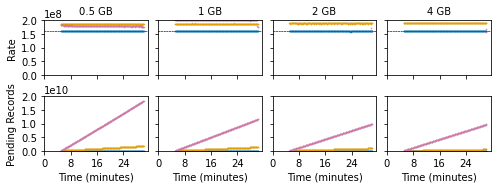

q2 - 8192 - x1.0 : Asked:190000000 Avg:188665475.81568843 Ratio 99.29761885036234 Avg/Max Pending: 182696153.2650132(0.9615587013948063s)/372419932.29219675(1.9601049068010354s) Last 5m avg pending: 330092072.4226275(1.7373266969611973s)
q2 - 8192 - x1.2 : Asked:228000000 Avg:221862455.32285696 Ratio 97.30809443984954 Avg/Max Pending: 2606481378.4258327(11.43193587028874s)/3472537797.8885202(15.230428938107545s) Last 5m avg pending: 3280683615.4008675(14.388963225442401s)
q2 - 8192 - x1.5 : Asked:285000000 Avg:233395784.39297485 Ratio 81.89325768174555 Avg/Max Pending: 25513412018.51502(89.5207439246141s)/32708523939.60382(114.76675066527656s) Last 5m avg pending: 31134495347.935844(109.24384332609068s)
q2 - 16384 - x1.0 : Asked:190000000 Avg:189999589.76605198 Ratio 99.99978408739578 Avg/Max Pending: -344748.98184658313(-0.0018144683255083324s)/-162193.97891941667(-0.0008536525206285087s) Last 5m avg pending: -302469.15490282903(-0.0015919429205412054s)
q2 - 16384 - x1.2 : Asked:22800

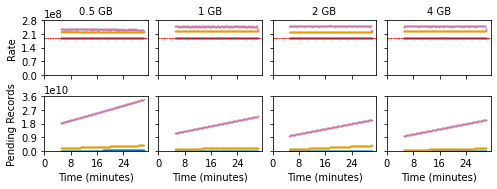

/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-2)]["pending_records"].mean()
/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-2)]["pending_records"].mean()
/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_secon

q5 - 32768 - x1.0 : Asked:2500000 Avg:2500000.037113478 Ratio 100.00000148453911 Avg/Max Pending: 4609948.037148594(1.8439792148594376s)/201534187.0(80.6136748s) Last 5m avg pending: 0.0(0.0s)
q5 - 32768 - x1.2 : Asked:3000000 Avg:2999974.45689719 Ratio 99.99914856323966 Avg/Max Pending: 11322236.857286433(3.7740789524288108s)/309923260.0(103.30775333333334s) Last 5m avg pending: 452992.09803921566(0.1509973660130719s)
q5 - 32768 - x1.5 : Asked:3750000 Avg:3641918.791815518 Ratio 97.1178344484138 Avg/Max Pending: 203955331.87148595(54.38808849906292s)/972721831.0(259.39248826666665s) Last 5m avg pending: 45556086.568627454(12.148289751633987s)
q5 - 65536 - x1.0 : Asked:2500000 Avg:2499999.974167228 Ratio 99.99999896668913 Avg/Max Pending: 5080.2359437751(0.00203209437751004s)/766201.0(0.3064804s) Last 5m avg pending: -0.48936170212765956(-1.9574468085106383e-07s)
q5 - 65536 - x1.2 : Asked:3000000 Avg:2999999.060116146 Ratio 99.99996867053821 Avg/Max Pending: 129032.75778894473(0.043010

/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-2)]["pending_records"].mean()


q5 - 65536 - x1.5 : Asked:3750000 Avg:3750024.3307493287 Ratio 100.0006488199821 Avg/Max Pending: 4112439.9969849247(1.0966506658626465s)/63643255.0(16.971534666666667s) Last 5m avg pending: 4299779.470588235(1.1466078588235293s)


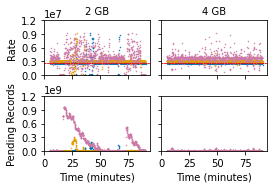

/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-2)]["pending_records"].mean()
/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-2)]["pending_records"].mean()
/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_secon

q11 - 8192 - x1.0 : Asked:20000000 Avg:19999778.18667341 Ratio 99.99889093336705 Avg/Max Pending: 1848.3236363636363(9.241618181818181e-05s)/30320.0(0.001516s) Last 5m avg pending: 1253.0(6.265e-05s)
q11 - 8192 - x1.2 : Asked:24000000 Avg:23999779.5130713 Ratio 99.99908130446374 Avg/Max Pending: 8184.2872727272725(0.0003410119696969697s)/307098.0(0.01279575s) Last 5m avg pending: 20328.49019607843(0.0008470204248366012s)
q11 - 8192 - x1.5 : Asked:30000000 Avg:19740356.115979385 Ratio 65.80118705326463 Avg/Max Pending: 5819306587.4(193.97688624666665s)/11541830378.0(384.72767926666666s) Last 5m avg pending: 10317896779.490196(343.9298926496732s)
q11 - 16384 - x1.0 : Asked:20000000 Avg:19999789.68346897 Ratio 99.99894841734486 Avg/Max Pending: 1703.876811594203(8.519384057971015e-05s)/17103.0(0.00085515s) Last 5m avg pending: 2058.1063829787236(0.00010290531914893618s)
q11 - 16384 - x1.2 : Asked:24000000 Avg:23999752.5657714 Ratio 99.9989690240475 Avg/Max Pending: 8707.505454545455(0.000

/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-2)]["pending_records"].mean()
/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-2)]["pending_records"].mean()
/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_secon

q11 - 65536 - x1.0 : Asked:20000000 Avg:19999801.274962958 Ratio 99.9990063748148 Avg/Max Pending: 2050.3454545454547(0.00010251727272727274s)/63259.0(0.00316295s) Last 5m avg pending: 1230.0434782608695(6.150217391304348e-05s)
q11 - 65536 - x1.2 : Asked:24000000 Avg:23738911.11374342 Ratio 98.91212964059758 Avg/Max Pending: 258823967.96363637(10.784331998484848s)/437288159.0(18.220339958333334s) Last 5m avg pending: 400212242.627451(16.675510109477123s)
q11 - 65536 - x1.5 : Asked:30000000 Avg:25608097.104978397 Ratio 85.36032368326133 Avg/Max Pending: 3513514668.673913(117.11715562246377s)/5046864435.0(168.2288145s) Last 5m avg pending: 4706719502.829787(156.89065009432625s)


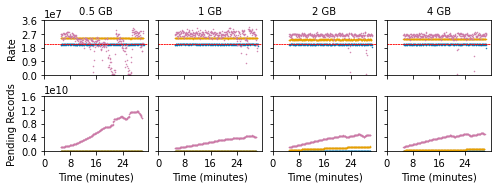

/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-2)]["pending_records"].mean()
/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-2)]["pending_records"].mean()
/tmp/ipykernel_2208048/646400865.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_secon

q8 - 32768 - x1.5 : Asked:22500000 Avg:22499973.224950917 Ratio 99.99988099978185 Avg/Max Pending: 505990.06300963677(0.022488447244872745s)/8435914.0(0.3749295111111111s) Last 5m avg pending: 2011409.0185185184(0.08939595637860082s)
q8 - 32768 - x1.0 : Asked:15000000 Avg:14999879.52044007 Ratio 99.9991968029338 Avg/Max Pending: 921.8435878428465(6.14562391895231e-05s)/93746.0(0.0062497333333333335s) Last 5m avg pending: 1077.9107142857142(7.186071428571428e-05s)
q8 - 65536 - x1.5 : Asked:22500000 Avg:22499888.001893736 Ratio 99.99950223063883 Avg/Max Pending: 60325.06819866568(0.002681114142162919s)/1279141.0(0.05685071111111111s) Last 5m avg pending: 200694.09259259258(0.00891973744855967s)
q8 - 65536 - x1.0 : Asked:15000000 Avg:14999878.935330525 Ratio 99.9991929022035 Avg/Max Pending: 1194.4225352112676(7.962816901408451e-05s)/339535.0(0.022635666666666665s) Last 5m avg pending: 1735.982142857143(0.00011573214285714286s)


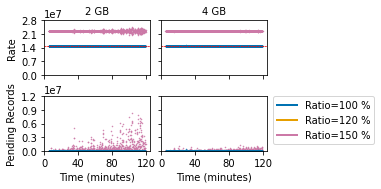

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

color_dict = {1: "#0072b2", 1.2: "#e69f00", 1.5: "#cc79a7"}

# Assuming you have a pandas dataframe `df` with columns 'query', 'ratio', 'memory', 'from_beginning', 'pending_records', and 'rate_source'

# Convert 'from_beginning' to seconds
df['from_beginning_seconds'] = df['from_beginning'].dt.total_seconds() / 60
df_p['from_beginning_seconds'] = df_p['from_beginning'].dt.total_seconds() / 60

# Get unique values of 'query', 'memory', and 'ratio'
unique_queries = df['query'].unique()
unique_ratios = df['ratio'].unique()
map_ylim_rate = {
    "q1": 2e8,
    "q2": 2.8e8,
    "q5": 1.2e7,
    "q8": 2.8e7,
    "q11": 3.6e7
}
map_ylim_pending = {
    "q1": 2e10,
    "q2": 3.6e10,
    "q5": 1.2e9,
    "q8": 1.2e7,
    "q11": 1.6e10
}




# Determine the number of subplot rows and columns based on the number of unique queries and memories
num_rows = 2 # since you want to have rate and pending on separate rows

# Group by 'query', 'memory', and 'ratio' and plot the 'rate_source' and 'pending_records' against 'from_beginning_seconds' for each group
for idx, query in enumerate(unique_queries):
    # Create a new figure for each query
    # Shared x axis is created by using sharex='col'
    unique_memories = df[(df['query'] == query)]["memory"].unique()
    num_cols = len(unique_memories)
    unique_ratios = df[(df['query'] == query)]["ratio"].unique()
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(2*num_cols, 1.2*num_rows), sharex='col', sharey="row")

    for j, memory in enumerate(unique_memories):
        ax_rate = axes[0, j] 
        ax_pending = axes[1, j]
        for k, ratio in enumerate(unique_ratios):
            group_data = df[(df['query'] == query) & (df['memory'] == memory) & (df['ratio'] == ratio)]
            group_data_p = df_p[(df_p['query'] == query) & (df_p['memory'] == memory) & (df_p['ratio'] == ratio)]

            average_rate = group_data[(group_data["from_beginning_seconds"] >= 5)&(group_data["from_beginning_seconds"] <= group_data["from_beginning_seconds"].max()-2)]["rate_source"].mean()
            asked_rate = group_data["run"].unique()[0]
            if query in ["q1", "q2"]:
                average_pending = group_data[(group_data["from_beginning_seconds"] >= 5)&(group_data["from_beginning_seconds"] <= group_data["from_beginning_seconds"].max()-2)]["pending_records"].mean()
                max_pending = group_data[(group_data["from_beginning_seconds"] >= 5)&(group_data["from_beginning_seconds"] <= group_data["from_beginning_seconds"].max()-2)]["pending_records"].max()
                last_average_pending = group_data[(group_data["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_seconds"] <= group_data["from_beginning_seconds"].max()-2)]["pending_records"].mean()
            else:
                average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= 5)&(group_data_p["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-2)]["pending_records"].mean()
                max_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= 5)&(group_data_p["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-2)]["pending_records"].max()
                last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= group_data["from_beginning_seconds"].max() - 7)&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-2)]["pending_records"].mean()

            print(f"{query} - {memory} - x{ratio} : Asked:{asked_rate} Avg:{average_rate} Ratio {average_rate/asked_rate * 100} Avg/Max Pending: {average_pending}({average_pending/asked_rate}s)/{max_pending}({max_pending/asked_rate}s) Last 5m avg pending: {last_average_pending}({last_average_pending/asked_rate}s)")
            ax_rate.axhline(y=group_data["TPS"].unique()[0], color="r", linestyle="--", lw=0.5)
            ax_rate.scatter(group_data['from_beginning_seconds'].values, group_data['rate_source'].values, s=0.25, label=f'Ratio={ratio}', color=color_dict[ratio])  # Adjust 's' to control the size of the scatter dots
            if query in ["q1", "q2"]:
                ax_pending.scatter(group_data['from_beginning_seconds'].values, group_data['pending_records'].values, s=0.25, label=f'Ratio={ratio}', color=color_dict[ratio])  # Adjust 's' to control the size of the scatter dots
            else:
                ax_pending.scatter(group_data_p['from_beginning_seconds'].values, group_data_p['pending_records'].values, s=0.25, label=f'Ratio={ratio}', color=color_dict[ratio])  # Adjust 's' to control the size of the scatter dots
            #ax_rate.autoscale(enable=True, axis='y', tight=True)
            #ax_rate.set_ymargin(0.10)  # 10% margin
            #max_y = group_data[(group_data["from_beginning_seconds"] >= 300)&(group_data["from_beginning_seconds"] <= group_data["from_beginning_seconds"].max()-120)]["rate_source"].max()
            #ax_rate.set_ylim(top = max_y*1.1)
            #ax_pending.autoscale(enable=True, axis='y', tight=True)
            #ax_pending.set_ymargin(0.10)  # 10% margin
            #ax_pending.autoscale(enable=True, axis='y', tight=True)

            # Calculate y-ticks
            
            #y_lower, y_upper = ax_rate.get_ylim()
            y_lower=0
            y_upper=map_ylim_rate[query]
            y_range = y_upper - y_lower
            y_step = y_range / 4  # Replace 4 with the number of ticks you want - 1
            y_ticks = np.arange(y_lower, y_upper + y_step, y_step)

            # Set y-ticks
            ax_rate.set_yticks(y_ticks)
            ax_rate.set_ylim(0,map_ylim_rate[query])
            # Calculate y-ticks
            #y_lower, y_upper = ax_pending.get_ylim()
            y_lower=0
            y_upper=map_ylim_pending[query]

            y_range = y_upper - y_lower
            y_step = y_range / 4  # Replace 4 with the number of ticks you want - 1
            y_ticks = np.arange(y_lower, y_upper + y_step, y_step)

            # Set y-ticks
            ax_pending.set_yticks(y_ticks)   
            ax_pending.set_ylim(0,map_ylim_pending[query])


        ax_rate.xaxis.set_major_locator(ticker.MaxNLocator(4))  # Set x axis to have 10 ticks
        #ax_rate.yaxis.set_major_locator(ticker.MaxNLocator(3))  # Set y axis to have 10 ticks
        ax_pending.xaxis.set_major_locator(ticker.MaxNLocator(4))  # Set x axis to have 10 ticks
        #ax_pending.yaxis.set_major_locator(ticker.MaxNLocator(3))  # Set y axis to have 10 ticks

        #ax_rate.set_yticks(list(ax_rate.get_yticks()) + [df[(df['query'] == query) ]['rate_source'].max()])  # Ensure maximum value is included in y ticks
        #if query in ["q1", "q2"]:
        #    ax_pending.set_yticks(list(ax_pending.get_yticks()) + [df[(df['query'] == query)]['pending_records'].max()])  # Ensure maximum value is included in y ticks
        #else:
        #    ax_pending.set_yticks(list(ax_pending.get_yticks()) + [df_p[(df_p['query'] == query)]['pending_records'].max()])  # Ensure maximum value is included in y ticks
        # Set common properties
        for ax in [ax_rate, ax_pending]:
            ax.set_xbound(lower=0)  # Set x-axis lower bound to zero
            #ax.set_ybound(lower=0)  # Set y-axis lower bound to zero
            #ax.set_ylim(bottom=0)

            #ax.set_xticks(list(ax.get_xticks()) + [group_data['from_beginning_seconds'].max()])  # Ensure maximum value is included in x ticks
        

        ax_pending.set_xlabel('Time (minutes)') 
        #ax_pending.set_yscale('log')
        if j == 0:
            ax_rate.set_ylabel('Rate')
            ax_pending.set_ylabel('Pending Records')
        memory_gb = memory / 16 / 1024
        ax_rate.set_title(f'{memory_gb:.0f} GB' if memory_gb.is_integer() else f'{memory_gb:.1f} GB', fontsize=10)  # Only the rate_source subplots will have the memory title
        
        #ax_pending.set_yscale('log')  # Set log scale for the y-axis (pending_records)
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=color_dict[ratio], lw=2) for ratio in [1.0, 1.2, 1.5]]
    if query=="q8":
        plt.legend(custom_lines, [f'Ratio={ratio} %' for ratio in [100, 120, 150]], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    # Adjust layout and spacing
    #plt.tight_layout()
    plt.subplots_adjust(hspace=0.4, wspace=0.1)
    # Set figure title as the query
    #fig.suptitle(f'Query: {query}', fontsize=16)
    # Show the plots
    plt.savefig(f"plots/r6-{query}.pdf", format='pdf', bbox_inches='tight')
    plt.show()
     

## q5

/tmp/ipykernel_1868947/772810770.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= (group_data_p["from_beginning_seconds"].max() - 520))&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-120)]["pending_records"].mean()
/tmp/ipykernel_1868947/772810770.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= (group_data_p["from_beginning_seconds"].max() - 520))&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-120)]["pending_records"].mean()
/tmp/ipykernel_1868947/772810770.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= (group_data_p["from_beginning_seconds"].max() - 520))&(group_data

q5 - 32768 - x1 : Asked:2500000 Avg:nan Ratio nan Avg/Max Pending: nan(nans)/nan(nans) Last 5m avg pending: nan(nans)
q5 - 32768 - x1.2 : Asked:3000000 Avg:nan Ratio nan Avg/Max Pending: nan(nans)/nan(nans) Last 5m avg pending: nan(nans)
q5 - 32768 - x1.5 : Asked:3750000 Avg:nan Ratio nan Avg/Max Pending: nan(nans)/nan(nans) Last 5m avg pending: nan(nans)
q5 - 65536 - x1 : Asked:2500000 Avg:nan Ratio nan Avg/Max Pending: nan(nans)/nan(nans) Last 5m avg pending: nan(nans)
q5 - 65536 - x1.2 : Asked:3000000 Avg:nan Ratio nan Avg/Max Pending: nan(nans)/nan(nans) Last 5m avg pending: nan(nans)
q5 - 65536 - x1.5 : Asked:3750000 Avg:nan Ratio nan Avg/Max Pending: nan(nans)/nan(nans) Last 5m avg pending: nan(nans)


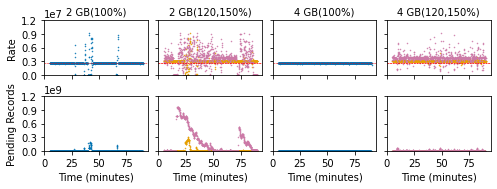

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

color_dict = {1: "#0072b2", 1.2: "#e69f00", 1.5: "#cc79a7"}

# Assuming you have a pandas dataframe `df` with columns 'query', 'ratio', 'memory', 'from_beginning', 'pending_records', and 'rate_source'

# Convert 'from_beginning' to seconds
df['from_beginning_seconds'] = df['from_beginning'].dt.total_seconds() / 60
df_p['from_beginning_seconds'] = df_p['from_beginning'].dt.total_seconds() / 60

# Get unique values of 'query', 'memory', and 'ratio'
unique_queries = df['query'].unique()
unique_ratios = df['ratio'].unique()

map_ylim_rate = {
    "q1": 2e8,
    "q2": 2.8e8,
    "q5-1": 1.2e7,
    "q5-1.2": 1.2e7,
    "q8": 2.8e7,
    "q11": 3.6e7
}
map_ylim_pending = {
    "q5-1": 0.4e9,
    "q5-1.2": 1.2e9,
    "q11": 1.6e10
}

# Determine the number of subplot rows and columns based on the number of unique queries and memories
num_rows = 2 # since you want to have rate and pending on separate rows
ratio_combinations = [[1], [1.2, 1.5]]
unique_combinations = [32768,65536]
combinations = []
for memory in unique_combinations:
    for ratio in ratio_combinations:
        combinations.append((memory, ratio))

# Group by 'query', 'memory', and 'ratio' and plot the 'rate_source' and 'pending_records' against 'from_beginning_seconds' for each group
for idx, query in enumerate(unique_queries):
    if query != "q5":
        continue
    # Create a new figure for each query
    # Shared x axis is created by using sharex='col'
    #unique_memories = df[(df['query'] == query)]["memory"].unique()
    num_cols = len(combinations)
    unique_ratios = df[(df['query'] == query)]["ratio"].unique()
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(2*num_cols, 1.2*num_rows), sharex='col', sharey="row")
    for (j, combination) in enumerate(combinations):
        (memory, ratio_combination) = combination
        for ratio in ratio_combination:

            ax_rate = axes[0, j] 
            ax_pending = axes[1, j]

            group_data = df[(df['query'] == query) & (df['memory'] == memory) & (df['ratio'] == ratio)]
            group_data_p = df_p[(df_p['query'] == query) & (df_p['memory'] == memory) & (df_p['ratio'] == ratio)]

            average_rate = group_data[(group_data["from_beginning_seconds"] >= 300)&(group_data["from_beginning_seconds"] <= group_data["from_beginning_seconds"].max()-120)]["rate_source"].mean()
            asked_rate = group_data["run"].unique()[0]
            if query in ["q1", "q2"]:
                average_pending = group_data[(group_data["from_beginning_seconds"] >= 300)&(group_data["from_beginning_seconds"] <= group_data["from_beginning_seconds"].max()-120)]["pending_records"].mean()
                max_pending = group_data[(group_data["from_beginning_seconds"] >= 300)&(group_data["from_beginning_seconds"] <= group_data["from_beginning_seconds"].max()-120)]["pending_records"].max()
                last_average_pending = group_data[(group_data["from_beginning_seconds"] >= (group_data["from_beginning_seconds"].max() - 520))&(group_data["from_beginning_seconds"] <= group_data["from_beginning_seconds"].max()-120)]["pending_records"].mean()
            else:
                average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= 300)&(group_data_p["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-120)]["pending_records"].mean()
                max_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= 300)&(group_data_p["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-120)]["pending_records"].max()
                last_average_pending = group_data_p[(group_data_p["from_beginning_seconds"] >= (group_data_p["from_beginning_seconds"].max() - 520))&(group_data["from_beginning_seconds"] <= group_data_p["from_beginning_seconds"].max()-120)]["pending_records"].mean()

            print(f"{query} - {memory} - x{ratio} : Asked:{asked_rate} Avg:{average_rate} Ratio {average_rate/asked_rate * 100} Avg/Max Pending: {average_pending}({average_pending/asked_rate}s)/{max_pending}({max_pending/asked_rate}s) Last 5m avg pending: {last_average_pending}({last_average_pending/asked_rate}s)")
            ax_rate.axhline(y=group_data["TPS"].unique()[0], color="r", linestyle="--", lw=0.5)
            ax_rate.scatter(group_data['from_beginning_seconds'].values, group_data['rate_source'].values, s=0.25, label=f'Ratio={ratio}', color=color_dict[ratio])  # Adjust 's' to control the size of the scatter dots
            if query in ["q1", "q2"]:
                ax_pending.scatter(group_data['from_beginning_seconds'].values, group_data['pending_records'].values, s=0.25, label=f'Ratio={ratio}', color=color_dict[ratio])  # Adjust 's' to control the size of the scatter dots
            else:
                ax_pending.scatter(group_data_p['from_beginning_seconds'].values, group_data_p['pending_records'].values, s=0.25, label=f'Ratio={ratio}', color=color_dict[ratio])  # Adjust 's' to control the size of the scatter dots
            #ax_rate.autoscale(enable=True, axis='y', tight=True)
            #ax_rate.set_ymargin(0.10)  # 10% margin
            #max_y = group_data[(group_data["from_beginning_seconds"] >= 300)&(group_data["from_beginning_seconds"] <= group_data["from_beginning_seconds"].max()-120)]["rate_source"].max()
            #ax_rate.set_ylim(top = max_y*1.1)
            #ax_pending.autoscale(enable=True, axis='y', tight=True)
            #ax_pending.set_ymargin(0.10)  # 10% margin
            #ax_pending.autoscale(enable=True, axis='y', tight=True)

            # Calculate y-ticks
            
            #y_lower, y_upper = ax_rate.get_ylim()
            y_lower=0
            y_upper=map_ylim_rate[f"{query}-{ratio_combination[0]}"]
            y_range = y_upper - y_lower
            y_step = y_range / 4  # Replace 4 with the number of ticks you want - 1
            y_ticks = np.arange(y_lower, y_upper + y_step, y_step)

            # Set y-ticks
            ax_rate.set_yticks(y_ticks)
            ax_rate.set_ylim(0,map_ylim_rate[f"{query}-{ratio_combination[0]}"])
            # Calculate y-ticks
            #y_lower, y_upper = ax_pending.get_ylim()
            y_lower=0
            y_upper=map_ylim_pending[f"{query}-{ratio_combination[0]}"]

            y_range = y_upper - y_lower
            y_step = y_range / 4  # Replace 4 with the number of ticks you want - 1
            y_ticks = np.arange(y_lower, y_upper + y_step, y_step)

            # Set y-ticks
            ax_pending.set_yticks(y_ticks)   
            ax_pending.set_ylim(0,map_ylim_pending[f"{query}-{ratio_combination[0]}"])

            for ax in [ax_rate, ax_pending]:
                ax.set_xbound(lower=0)  # Set x-axis lower bound to zero
                #ax.set_ybound(lower=0)  # Set y-axis lower bound to zero
                #ax.set_ylim(bottom=0)

                #ax.set_xticks(list(ax.get_xticks()) + [group_data['from_beginning_seconds'].max()])  # Ensure maximum value is included in x ticks
            ax_rate.xaxis.set_major_locator(ticker.MaxNLocator(4))  # Set x axis to have 10 ticks
            #ax_rate.yaxis.set_major_locator(ticker.MaxNLocator(3))  # Set y axis to have 10 ticks
            ax_pending.xaxis.set_major_locator(ticker.MaxNLocator(4))  # Set x axis to have 10 ticks
                

            ax_pending.set_xlabel('Time (minutes)') 
            #ax_pending.set_yscale('log')
            if j == 0:
                ax_rate.set_ylabel('Rate')
                ax_pending.set_ylabel('Pending Records')
            text_ratio = "100%" if ratio_combination[0] == 1 else "120,150%"
            ax_rate.set_title(f'{int(memory / 16 / 1024) } GB({text_ratio})', fontsize=10)  # Only the rate_source subplots will have the memory title
            
            #ax_pending.set_yscale('log')  # Set log scale for the y-axis (pending_records)

    # Adjust layout and spacing
    #plt.tight_layout()
    plt.subplots_adjust(hspace=0.4, wspace=0.1)
    # Set figure title as the query
    #fig.suptitle(f'Query: {query}', fontsize=16)
    # Show the plots
    plt.savefig(f"plots/r6-{query}.pdf", format='pdf', bbox_inches='tight')
    plt.show()
        

## Model

In [11]:
map_throughput = {}
map_model_type = {}
unique_queries = df['query'].unique()

for query in unique_queries:
    map_throughput[query] = df_synthese[df_synthese["query"] == query]["TPS"].unique()[0]
display(map_throughput)
map_model_type = {
    "q1": "linear",
    "q2": "linear",
    "q5": "log",
    "q8": "sqrt",
    "q11": "linear"
}
display(map_model_type)

{'q1': 160000000,
 'q2': 190000000,
 'q5': 2500000,
 'q11': 20000000,
 'q8': 15000000}

{'q1': 'linear', 'q2': 'linear', 'q5': 'log', 'q8': 'sqrt', 'q11': 'linear'}

In [12]:
map_model_files = {}
unique_queries = df['query'].unique()
for query in unique_queries:
    
    for value in map_files.values():
        if query in value:
            print(f"{query} {value}")
            map_model_files[query] = value
            break


q1 ./search-results/final/q1-20230704233749
q2 ./search-results/final/q2-20230711014507
q5 ./search-results/final/q5-20230620132451
q11 ./search-results/final/q11-20230615031213
q8 ./search-results/final/q8-20230628131449


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

scores_selected = []
regs = {}
predictions={}
selected_runs = {}
for query in map_model_files:

    if query not in predictions:
        predictions[query] = []


    result_file = map_model_files[query]
    reg = streambed.InfrastructureRegression()
    reg.load("{}.csv".format(result_file))
    reg.load_details("{}-details.yaml".format(result_file))
    print(f"Query {query}, runs {len(reg.data)}")
    pipelines = {
        "linear": make_pipeline(PolynomialFeatures(degree=1),  LinearRegression()),
        "log": make_pipeline(FunctionTransformer(np.log1p, validate=True), LinearRegression()),
        "sqrt": make_pipeline(FunctionTransformer(np.sqrt, validate=True), LinearRegression())
    }

    for pipeline in pipelines:
        print("******** {} *******".format(pipeline))
        (models, scores) = reg.generic_models(pipelines[pipeline],4, 20)
        low_score = None
        low_index = None
        for i in range(len(models)): 
            if (low_score is None) or (low_score < scores[i]):
                low_index = i
                low_score = scores[i]
                reg.set_model(pipeline, models[i])
            if pipeline == map_model_type[query]:
                pred = reg.compute_x(map_model_type[query], map_throughput[query] * 1.1, range(3,2000), [65536])
                predictions[query].extend([i, -scores[i], pred[0][0]])
                scores_selected.append([query, i, -scores[i], pred[0][0]])
                print("{} {} {}".format(i, -scores[i], pred[0][0]))

            #logger.debug("{} {} {}".format(i, scores[i], reg.compute_x(pipeline, throughputs[0], range(10,1000), [65536])))
        if pipeline == map_model_type[query]:
            selected_runs[query] = low_index + 4 # add corners
        
    print("Selected: {} - {}".format(low_index, scores[low_index], reg.compute_x(map_model_type[query], map_throughput[query] * 1.1, range(10,1000), [65536])))
    print("Coef {} Intercept {}".format(reg.models[map_model_type[query]].named_steps["linearregression"].coef_, reg.models[map_model_type[query]].named_steps["linearregression"].intercept_))
    regs[query] = reg

Query q1, runs 30
******** linear *******
0 761967.5700003477 183
1 589937.8244797662 183
2 596120.7220666397 183
3 478664.7163636338 180
4 522864.24730976217 180
5 457684.5502562603 178
6 783478.1199244823 178
7 683982.5362185336 178
8 648194.9325920257 178
9 602754.6496002926 178
10 684151.9964280366 178
11 806440.7704033426 178
12 776367.535573521 178
13 761848.82282106 178
14 766072.3478268362 178
15 742884.6389263121 178
******** log *******
******** sqrt *******
Selected: 3 - -354442.518756891
Coef [0.00000000e+00 9.90145137e+05 1.01335631e+01] Intercept -799536.3154798653
Query q2, runs 30
******** linear *******
0 1217786.745292935 70
1 1003724.406851197 69
2 760081.2967880898 70
3 609086.4404953145 70
4 553631.3664523276 70
5 487690.90972267184 70
6 499197.52325989644 70
7 474451.516342781 69
8 448960.6379286874 68
9 479971.8671344487 68
10 456167.38976357336 68
11 429984.17928056465 69
12 418964.7888801391 69
13 395120.3970295885 69
14 371965.95777078305 69
15 366278.66222673

In [18]:
for query in regs:
    print(query)
    #print(f"{query} {len(regs[query].data)}")
    display(regs[query].data[["used_task_slots","memory"]])
    #for index, row in regs[query].data[["used_task_slots","memory"]]:    
         

q1


,used_task_slots,memory
0,2,8192
1,16,8192
2,2,65536
3,16,65536
4,2,65536
5,2,49152
6,11,49152
7,2,8192
8,16,65536
9,2,16384


q2


,used_task_slots,memory
0,2,8192
1,6,8192
2,2,65536
3,6,65536
4,2,65536
5,2,49152
6,5,49152
7,6,65536
8,2,8192
9,2,16384


q5


,used_task_slots,memory
0,9,32768
1,48,32768
2,9,65536
3,48,65536
4,9,65536
5,35,65536
6,48,32768
7,9,32768
8,48,65536
9,11,65536


q11


,used_task_slots,memory
0,4,8192
1,48,8192
2,4,65536
3,48,65536
4,4,65536
5,4,49152
6,33,49152
7,48,65536
8,4,8192
9,4,16384


q8


,used_task_slots,memory
0,9,32768
1,32,32768
2,9,65536
3,32,65536
4,9,65536
5,24,65536
6,32,32768
7,32,65536
8,9,32768
9,11,32768


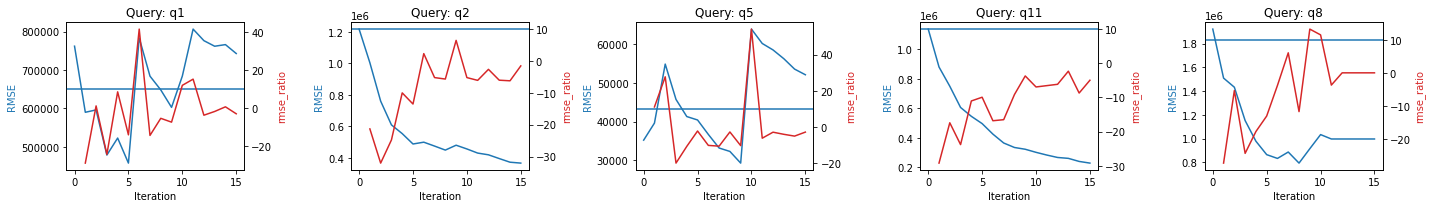

In [19]:


import pandas as pd
import matplotlib.pyplot as plt
columns=["query", "iteration", "rmse", "ts"]
df_scores = pd.DataFrame(scores_selected, columns=columns)
df_scores
df_scores['rmse_ratio'] = df_scores.groupby('query')['rmse'].apply(lambda x: ((x-x.shift(1))/x) ).reset_index(level=0, drop=True)

# Assuming df_scores is your DataFrame
# df_scores = pd.read_csv('your_data.csv')  # Uncomment this line if you're loading a csv file

unique_queries = df_scores['query'].unique()
num_rows = 1
num_cols = len(unique_queries)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 3*num_rows), sharex='col')

for j, query in enumerate(unique_queries):
    ax1 = axes[j]
    ax2 = ax1.twinx()
    
    plot_data = df_scores[df_scores['query'] == query]
    iterations = plot_data['iteration'].to_numpy()
    rmse = plot_data['rmse'].to_numpy()
    #ts = plot_data['ts'].to_numpy()
    ts = plot_data['rmse_ratio'].to_numpy() *100
    ax2.axhline(10)
    ax1.plot(iterations, rmse, color='tab:blue')
    ax2.plot(iterations, ts, color='tab:red')
    
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('RMSE', color='tab:blue')
    ax2.set_ylabel('rmse_ratio', color='tab:red')
    
    # Set the title as the query name
    ax1.set_title(f'Query: {query}')

plt.tight_layout()
plt.savefig(f"plots/r6-score.pdf", format='pdf', bbox_inches='tight')
plt.show()

## check model type

In [20]:
from sklearn.base import clone
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error
for query in regs:
    print(query)
    reg = regs[query]
    data = reg.data[["used_task_slots", "memory", "observed_source_rate"]].head(selected_runs[query] + 1)
    limit_ts_train = reg.data["used_task_slots"].max() // 2
    train = data.query("(used_task_slots < {})".format(limit_ts_train))
    test = data.query("(used_task_slots >= {})".format(limit_ts_train))
    X_train = train.iloc[:, :-1].values
    y_train = train.iloc[:, -1].values      
    X_test = test.iloc[:, :-1].values
    y_test = test.iloc[:, -1].values    
    for name in reg.models:
        print(name)
        model = clone(reg.models[name])
        loo = LeaveOneOut()
        scores = cross_val_score(model, X_train, y_train, cv=loo, scoring='neg_root_mean_squared_error')
        display(np.mean(scores))        

        model.fit(X_train,y_train)
        # Assess the trained model's performance on the validation set
        y_val_pred = model.predict(X_train)
        trained_rmse = np.sqrt(mean_squared_error(y_train, y_val_pred))
        print(f"Trained RMSE: {trained_rmse}")

        # Finally, you can evaluate the final model's performance on the test set.
        y_test_pred = model.predict(X_test)
        final_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        print(f"Final RMSE: {final_rmse}")  
        #logger.info(f"Model {name} - Trained RMSE: {trained_rmse} - Final RMSE: {final_rmse}")   

q1
linear


-130839.7322647128

Trained RMSE: 88935.024080205
Final RMSE: 12952842.03304647
log


-131612.8266800244

Trained RMSE: 90846.53181031728
Final RMSE: 12529246.128488917
sqrt


-130571.38368324742

Trained RMSE: 89573.26087189664
Final RMSE: 12954557.522316597
q2
linear


-213539.6203313898

Trained RMSE: 199755.32768494287
Final RMSE: 11198475.720781503
log


-221388.95137828073

Trained RMSE: 203842.92369616622
Final RMSE: 10299824.567290807
sqrt


-217152.3368891605

Trained RMSE: 202228.32253483002
Final RMSE: 11200188.747337008
q5
linear


-7705.6732894361385

Trained RMSE: 4655.113853609779
Final RMSE: 622561.623499895
log


-7059.643332265523

Trained RMSE: 4405.25600473578
Final RMSE: 212159.99000385846
sqrt


-7345.035268597528

Trained RMSE: 4503.3363630999265
Final RMSE: 95080.69668878213
q11
linear


-4521.103421291641

Trained RMSE: 4431.173390331541
Final RMSE: 1731928.380066021
log


-3476.6905938670243

Trained RMSE: 3208.1235083007587
Final RMSE: 1732105.5992792277
sqrt


-4072.725629759658

Trained RMSE: 3831.011373870575
Final RMSE: 1732004.5885570585
q8
linear


-276954.1241812846

Trained RMSE: 155658.68632211752
Final RMSE: 5399453.7700501615
log


-257995.65518241297

Trained RMSE: 149012.71208248753
Final RMSE: 1934337.5184248262
sqrt


-266376.0360621861

Trained RMSE: 152004.494610364
Final RMSE: 3148397.523084381


In [ ]:
import seaborn as sns
sns.relplot(data=df_scores, x="iteration", y="rmse")

In [147]:
for query in regs:
    print(regs[query].models["linear"].named_steps["linearregression"].coef_)

[0.00000000e+00 1.73235495e+05 6.29981176e+00]
[0.00000000e+00 1.73235495e+05 6.29981176e+00]
[0.00000000e+00 1.73235495e+05 6.29981176e+00]
[0.00000000e+00 1.73235495e+05 6.29981176e+00]
[0.00000000e+00 1.73235495e+05 6.29981176e+00]


In [22]:
for query in regs:
    reg = regs[query]
    print(reg.compute_x("linear", 1000000, range(2,100), [8192,16384,32768,65536]))

[[10, 8192], [10, 16384], [9, 32768], [8, 65536]]
[[10, 8192], [10, 16384], [9, 32768], [8, 65536]]
[[10, 8192], [10, 16384], [9, 32768], [8, 65536]]
[[10, 8192], [10, 16384], [9, 32768], [8, 65536]]
[[10, 8192], [10, 16384], [9, 32768], [8, 65536]]


In [16]:
predictions

{'q1': [[166, 65536],
  [166, 65536],
  [166, 65536],
  [164, 65536],
  [164, 65536],
  [162, 65536],
  [162, 65536],
  [162, 65536],
  [162, 65536],
  [162, 65536],
  [162, 65536],
  [162, 65536],
  [162, 65536],
  [162, 65536],
  [162, 65536],
  [162, 65536]],
 'q2': [[64, 65536],
  [63, 65536],
  [64, 65536],
  [63, 65536],
  [64, 65536],
  [64, 65536],
  [64, 65536],
  [62, 65536],
  [62, 65536],
  [62, 65536],
  [62, 65536],
  [63, 65536],
  [63, 65536],
  [63, 65536],
  [63, 65536],
  [63, 65536]],
 'q5': [[1006, 65536],
  [1006, 65536],
  [1006, 65536],
  [1006, 65536],
  [1006, 65536],
  [1006, 65536],
  [1006, 65536],
  [707, 65536],
  [703, 65536],
  [700, 65536],
  [700, 65536],
  [700, 65536],
  [700, 65536],
  [700, 65536],
  [700, 65536],
  [700, 65536]],
 'q11': [[725, 65536],
  [721, 65536],
  [653, 65536],
  [629, 65536],
  [669, 65536],
  [685, 65536],
  [599, 65536],
  [562, 65536],
  [562, 65536],
  [545, 65536],
  [546, 65536],
  [548, 65536],
  [551, 65536],
  [51

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.base import clone

for query in regs:
    reg = regs[query]
    print(query)
    limit_ts_train = reg.data["used_task_slots"].max() // 2
    data = reg.data[["used_task_slots", "memory", "observed_source_rate"]]        
    train = data.query("(used_task_slots < {})".format(limit_ts_train))
    test = data.query("(used_task_slots >= {})".format(limit_ts_train))
    X_train = train.iloc[:, :-1].values
    y_train = train.iloc[:, -1].values      
    X_test = test.iloc[:, :-1].values
    y_test = test.iloc[:, -1].values  
    for name in reg.models:  
        if name == map_model_type[query]:
            print(f"***********{name}*****************")
        else:
            print(name)
        model = clone(reg.models[name])
        loo = LeaveOneOut()
        scores = cross_val_score(model, X_train, y_train, cv=loo, scoring='neg_root_mean_squared_error')
        display(np.mean(scores))        

        model.fit(X_train,y_train)
        # Assess the trained model's performance on the validation set
        y_val_pred = model.predict(X_train)
        trained_rmse = np.sqrt(mean_squared_error(y_train, y_val_pred))
        print(f"Trained RMSE: {trained_rmse}")

        # Finally, you can evaluate the final model's performance on the test set.
        y_test_pred = model.predict(X_test)
        final_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        print(f"Final RMSE: {final_rmse}")  
        logger.info(f"Model {name} - Trained RMSE: {trained_rmse} - Final RMSE: {final_rmse}")   

q1
***********linear*****************


-167879.83142915752

Trained RMSE: 129550.42963245728
Final RMSE: 6167832.607536911
log


-250754.77399301383

Trained RMSE: 218991.05018646765
Final RMSE: 3065153.6292123687
sqrt


-224311.73505419312

Trained RMSE: 187136.37256458137
Final RMSE: 1339281.376943607
q2
***********linear*****************


-200980.2566307693

Trained RMSE: 200649.89196551364
Final RMSE: 11431388.21669413
log


-209158.4649685939

Trained RMSE: 204720.84287174421
Final RMSE: 11431809.725388382
sqrt


-205532.4463205768

Trained RMSE: 202765.40589597373
Final RMSE: 11432176.951690175
q5
linear


-10406.39738571664

Trained RMSE: 6505.84838316299
Final RMSE: 823211.6637016479
***********log*****************


-22357.051011163774

Trained RMSE: 12992.8404284227
Final RMSE: 122031.66687170429
sqrt


-16268.329240947454

Trained RMSE: 9686.775917460169
Final RMSE: 358066.62599983165
q11
***********linear*****************


-41413.07975789372

Trained RMSE: 4366.40031905909
Final RMSE: 575226.6382452534
log


-41590.53904157454

Trained RMSE: 4052.2871091076145
Final RMSE: 720846.1760041148
sqrt


-41202.131613957914

Trained RMSE: 4197.584631684655
Final RMSE: 530956.2658485724
q8
linear


-276954.1241812846

Trained RMSE: 155658.68632211752
Final RMSE: 5317854.747049525
log


-257995.65518241297

Trained RMSE: 149012.71208248753
Final RMSE: 2238318.3902386115
***********sqrt*****************


-266376.0360621861

Trained RMSE: 152004.494610364
Final RMSE: 3322574.4704830362


In [22]:
ar_df = []
for query in regs:
    reg = regs[query]
    task_managers_qty = 100
    X1 = []
    X2 = []
    y = []
    mo = []
    model = map_model_type[query]
    if model in ["q1", "q2", "q11"]:
        memory_range=[8192,16384,32768,65536]
    else:
        memory_range=[32768,65536]

    for i in range(1,task_managers_qty):
        for m in memory_range:
            t = 16*i
            X1.append(t)
            X2.append(m)
            val = reg.predict(model, t,m)[0]
            y.append(val)
            mo.append(model)

    df = pd.DataFrame({
        'query': np.array(query),
        'ts': np.array(X1),
        'mem': np.array(X2),
        'tp' : np.array(y),
    })
    #display(df)
    ar_df.append(df)
all_df = pd.concat(ar_df)
#sns.relplot(data=all_df, x="ts", y="tp", hue="mem", col="query")

In [23]:
print(all_df)

    query    ts    mem            tp
0      q1    16  32768  1.537484e+07
1      q1    16  65536  1.570690e+07
2      q1    32  32768  3.121716e+07
3      q1    32  65536  3.154922e+07
4      q1    48  32768  4.705949e+07
..    ...   ...    ...           ...
193    q8  1552  65536  5.555409e+07
194    q8  1568  32768  5.566102e+07
195    q8  1568  65536  5.585641e+07
196    q8  1584  32768  5.596180e+07
197    q8  1584  65536  5.615719e+07

[990 rows x 4 columns]


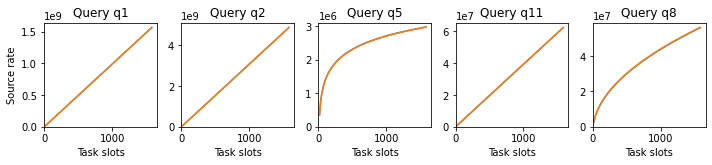

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming that `all_df` is your DataFrame and it already exists
# all_df = pd.read_csv('your_data.csv')  # Un-comment this line if you're loading a csv file

unique_queries = all_df['query'].unique()
unique_mems = all_df['mem'].unique()

num_rows = 1  # Since we're plotting 'tp' against 'ts', we only need one row
num_cols = len(unique_queries)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2*num_cols, 2.4*num_rows), sharex='col')

for j, query in enumerate(unique_queries):
    #if query == "q2" or query =="q1":
    #    continue
    ax = axes[j]  # Retrieve the appropriate axis
    ax.set_title(f'Query {query}')  # Set title as the query
    
    for mem in unique_mems:
        plot_data = all_df[(all_df['query'] == query) & (all_df['mem'] == mem)]
        ts = plot_data['ts'].to_numpy()
        tp = plot_data['tp'].to_numpy()
        ax.plot(ts, tp, label=f'Memory={mem}GB')  # Plot tp against ts for each memory value
    
    ax.set_xlabel('Task slots')
    # Only set the y label for the first subplot
    if j == 0:
        ax.set_ylabel('Source rate')
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    #ax.set_yscale("log")
    #ax.legend()
    #ax.autoscale(enable=True, axis='y', tight=True)
plt.tight_layout()
plt.savefig(f"plots/r6-model.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [30]:
for query in regs:
    model_type = map_model_type[query]
    reg = regs[query]
    print(query)
    pipelines = {
        "linear": make_pipeline(PolynomialFeatures(degree=1),  LinearRegression()),
        "log": make_pipeline(FunctionTransformer(np.log1p, validate=True), LinearRegression()),
        "sqrt": make_pipeline(FunctionTransformer(np.sqrt, validate=True), LinearRegression())
    }

    (models, scores) = reg.generic_models(pipelines[model_type],4, 20)
    for i in range(len(models)): 
        print(-scores[i])

q1
761967.5700003477
589937.8244797662
596120.7220666397
478664.7163636338
522864.24730976217
457684.5502562603
783478.1199244823
683982.5362185336
648194.9325920257
602754.6496002926
684151.9964280366
806440.7704033426
776367.535573521
761848.82282106
766072.3478268362
742884.6389263121
q2
1217786.745292935
1003724.406851197
760081.2967880898
609086.4404953145
553631.3664523276
487690.90972267184
499197.52325989644
474451.516342781
448960.6379286874
479971.8671344487
456167.38976357336
429984.17928056465
418964.7888801391
395120.3970295885
371965.95777078305
366278.6622267303
q5
35215.4097473407
39607.93110395857
54819.530525365444
45712.80287477846
41299.084024176016
40412.132670107254
36690.161673341965
33185.95395076398
32306.4044361262
29299.23628065188
63839.32934764327
60132.97087389264
58470.24967499596
56212.62913201732
53530.64060133228
52072.99340423204
q11
1136723.659323688
879725.0559628392
749265.3289055118
605227.8738727944
545100.7653387346
495834.2129722339
424454.6209

In [11]:
map_model_files

NameError: name 'map_model_files' is not defined